In [1]:
from requests import get

url = 'http://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1'

response = get(url)
print(response.text[:1000])




<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
        <title>IMDb: Most Voted Titles Released 2017-01-01 to 2017-12-31 - IMDb</title>
  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'functio

In [2]:
from bs4 import BeautifulSoup
html_soup=BeautifulSoup(response.text,'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [3]:
movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
50


In [6]:
print(movie_containers)

[<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt3315342"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt3315342/?ref_=adv_li_i"> <img alt="Logan" class="loadlate" data-tconst="tt3315342" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYzc5MTU4N2EtYTkyMi00NjdhLTg3NWEtMTY4OTEyMzJhZTAzXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB499613450_.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt3315342/?ref_=adv_li_tt">Logan</a>
<span class="lister-item-year text-muted unbold">(2017)</span>
</h3>
<p class="text-muted ">
<span class="certificate">A</span>
<span class="ghost">|</span>
<span class="runtime">137 min</span>
<span class="ghost">|<

In [7]:
first_movie = movie_containers[0]
first_movie

<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt3315342"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt3315342/?ref_=adv_li_i"> <img alt="Logan" class="loadlate" data-tconst="tt3315342" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYzc5MTU4N2EtYTkyMi00NjdhLTg3NWEtMTY4OTEyMzJhZTAzXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB499613450_.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt3315342/?ref_=adv_li_tt">Logan</a>
<span class="lister-item-year text-muted unbold">(2017)</span>
</h3>
<p class="text-muted ">
<span class="certificate">A</span>
<span class="ghost">|</span>
<span class="runtime">137 min</span>
<span class="ghost">|</

In [8]:
first_movie.div 


<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt3315342"></div>
</div>

In [9]:
first_movie.a

<a href="/title/tt3315342/?ref_=adv_li_i"> <img alt="Logan" class="loadlate" data-tconst="tt3315342" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYzc5MTU4N2EtYTkyMi00NjdhLTg3NWEtMTY4OTEyMzJhZTAzXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB499613450_.png" width="67"/>
</a>

In [10]:
first_movie.h3.a.text

'Logan'

In [11]:
first_year = first_movie.h3.find('span', class_ = 'lister-item-year text-muted unbold')
print(first_year)

<span class="lister-item-year text-muted unbold">(2017)</span>


In [12]:
first_year.text

'(2017)'

In [13]:
first_imdb=float(first_movie.strong.text)
print(first_imdb)

8.1


In [14]:
first_mscore = first_movie.find('span', class_ = 'metascore favorable')
first_mscore = int(first_mscore.text)
print(first_mscore)


77


In [15]:
first_votes=first_movie.find('span',attrs=({'name':'nv'}))
first_votes

<span data-value="495929" name="nv">495,929</span>

In [16]:
(first_votes.text)

'495,929'

In [17]:
first_votes = int(first_votes['data-value'])

In [18]:
eighth_movie_mscore = movie_containers[7].find('div', class_ = 'ratings-metascore')
type(eighth_movie_mscore)

bs4.element.Tag

In [19]:
# Lists to store the scraped data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

# Extract data from individual movie container
for container in movie_containers:

    # If the movie has Metascore, then extract:
    if container.find('div', class_ = 'ratings-metascore') is not None:

        # The name
        name = container.h3.a.text
        names.append(name)

        # The year
        year = container.h3.find('span', class_ = 'lister-item-year').text
        years.append(year)

        # The IMDB rating
        imdb = float(container.strong.text)
        imdb_ratings.append(imdb)

        # The Metascore
        m_score = container.find('span', class_ = 'metascore').text
        metascores.append(int(m_score))

        # The number of votes
        vote = container.find('span', attrs = {'name':'nv'})['data-value']
        votes.append(int(vote))

In [20]:
import pandas as pd

test_df = pd.DataFrame({'movie': names,
                       'year': years,
                       'imdb': imdb_ratings,
                       'metascore': metascores,
                       'votes': votes})
print(test_df.info())
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 5 columns):
imdb         47 non-null float64
metascore    47 non-null int64
movie        47 non-null object
votes        47 non-null int64
year         47 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 1.9+ KB
None


,imdb,metascore,movie,votes,year
0,8.1,77,Logan,495929,(2017)
1,7.5,76,Wonder Woman,425860,(2017)
2,8.0,94,Dunkirk,405318,(2017)
3,7.3,85,Star Wars: Episode VIII - The Last Jedi,400992,(2017)
4,7.7,67,Guardians of the Galaxy Vol. 2,396332,(2017)
5,7.9,74,Thor: Ragnarok,363211,(2017)
6,7.5,73,Spider-Man: Homecoming,342731,(2017)
7,7.7,84,Get Out,319436,(I) (2017)
8,8.1,81,Blade Runner 2049,314744,(2017)
9,7.7,86,Baby Driver,311896,(2017)


In [21]:
sorted_list=test_df[:-1].sort_values('imdb',ascending=False)
sorted_list

,imdb,metascore,movie,votes,year
19,8.4,81,Coco,199075,(I) (2017)
12,8.2,88,"Three Billboards Outside Ebbing, Missouri",257656,(2017)
0,8.1,77,Logan,495929,(2017)
8,8.1,81,Blade Runner 2049,314744,(2017)
2,8.0,94,Dunkirk,405318,(2017)
37,8.0,93,Call Me by Your Name,116413,(2017)
5,7.9,74,Thor: Ragnarok,363211,(2017)
32,7.8,73,Wind River,133968,(2017)
4,7.7,67,Guardians of the Galaxy Vol. 2,396332,(2017)
7,7.7,84,Get Out,319436,(I) (2017)


In [22]:
headers = {"Accept-Language": "en-US, en;q=0.5"}


In [23]:
pages = [str(i) for i in range(1,5)]
years_url = [str(i) for i in range(2000,2018)]

In [24]:
pages

['1', '2', '3', '4']

In [25]:
years_url[17]

'2017'

In [26]:
from time import sleep
from random import randint
from time import time

start_time = time()
requests = 0

for _ in range(5):
    # A request would go here
    requests += 1
    sleep(randint(1,3))
    elapsed_time = time() - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
    

Request: 1; Frequency: 0.3320426250397409 requests/s
Request: 2; Frequency: 0.3318557302836678 requests/s
Request: 3; Frequency: 0.3734062167539873 requests/s
Request: 4; Frequency: 0.3986043586327702 requests/s
Request: 5; Frequency: 0.38333980808332857 requests/s


In [27]:
from IPython.core.display import clear_output

start_time = time()
requests = 0

for _ in range(5):
    # A request would go here
    requests += 1
    sleep(randint(1,3))
    current_time = time()
    elapsed_time = current_time - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
    clear_output(wait = True)

Request: 5; Frequency: 0.49821244495798866 requests/s


In [28]:
from warnings import warn

warn("Warning Simulation")

C:\Users\rajaram jat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Warning Simulation
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

# Preparing the monitoring of the loop
start_time = time()
requests = 0

# For every year in the interval 2000-2017
for year_url in years_url:

    # For every page in the interval 1-4
    for page in pages:

        # Make a get request
        response = get('http://www.imdb.com/search/title?release_date=' + year_url + 
        '&sort=num_votes,desc&page=' + page, headers = headers)

        # Pause the loop
        sleep(randint(8,15))

        # Monitor the requests
        requests += 1
        elapsed_time = time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait = True)

        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))

        # Break the loop if the number of requests is greater than expected
        if requests > 72:
            warn('Number of requests was greater than expected.')  
            break 

        # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')

        # Select all the 50 movie containers from a single page
        mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')

        # For every movie of these 50
        for container in mv_containers:
            # If the movie has a Metascore, then:
            if container.find('div', class_ = 'ratings-metascore') is not None:

                # Scrape the name
                name = container.h3.a.text
                names.append(name)

                # Scrape the year 
                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)

                # Scrape the IMDB rating
                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)

                # Scrape the Metascore
                m_score = container.find('span', class_ = 'metascore').text
                metascores.append(int(m_score))

                # Scrape the number of votes
                vote = container.find('span', attrs = {'name':'nv'})['data-value']
                votes.append(int(vote))

Request:72; Frequency: 0.0694143278555952 requests/s


In [30]:
movie_ratings = pd.DataFrame({'movie': names,
                              'year': years,
                              'imdb': imdb_ratings,
                              'metascore': metascores,
                              'votes': votes})
print(movie_ratings.info())
movie_ratings.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2613 entries, 0 to 2612
Data columns (total 5 columns):
imdb         2613 non-null float64
metascore    2613 non-null int64
movie        2613 non-null object
votes        2613 non-null int64
year         2613 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 102.1+ KB
None


,imdb,metascore,movie,votes,year
0,8.5,67,Gladiator,1142958,(2000)
1,8.5,80,Memento,981382,(2000)
2,8.3,55,Snatch,687213,(2000)
3,8.3,68,Requiem for a Dream,666717,(2000)
4,7.4,64,X-Men,512518,(2000)
5,7.8,73,Cast Away,450419,(2000)
6,7.6,64,American Psycho,409322,(2000)
7,7.3,62,Unbreakable,297886,(2000)
8,7.0,73,Meet the Parents,284355,(2000)
9,6.1,59,Mission: Impossible II,271727,(2000)


In [31]:
movie_ratings = movie_ratings[['movie', 'year', 'imdb', 'metascore', 'votes']]
movie_ratings.head()

,movie,year,imdb,metascore,votes
0,Gladiator,(2000),8.5,67,1142958
1,Memento,(2000),8.5,80,981382
2,Snatch,(2000),8.3,55,687213
3,Requiem for a Dream,(2000),8.3,68,666717
4,X-Men,(2000),7.4,64,512518


In [32]:
movie_ratings['year'].unique()

array(['(2000)', '(I) (2000)', '(2001)', '(I) (2001)', '(2002)',
       '(I) (2002)', '(2003)', '(I) (2003)', '(2004)', '(I) (2004)',
       '(2005)', '(I) (2005)', '(2006)', '(I) (2006)', '(2007)',
       '(I) (2007)', '(2010)', '(I) (2010)', '(II) (2010)', '(2011)',
       '(I) (2011)', '(IV) (2011)', '(2012)', '(I) (2012)', '(II) (2012)',
       '(2013)', '(I) (2013)', '(II) (2013)', '(2014)', '(I) (2014)',
       '(II) (2014)', '(III) (2014)', '(2015)', '(I) (2015)',
       '(II) (2015)', '(VI) (2015)', '(III) (2015)', '(2016)',
       '(II) (2016)', '(I) (2016)', '(IX) (2016)', '(V) (2016)', '(2017)',
       '(I) (2017)', '(III) (2017)', '(II) (2017)'], dtype=object)

In [33]:
movie_ratings.loc[:, 'year'] = movie_ratings['year'].str[-5:-1].astype(int)

In [34]:
movie_ratings['year'].head(3)

0    2000
1    2000
2    2000
Name: year, dtype: int32

In [35]:
movie_ratings.describe().loc[['min', 'max'], ['imdb', 'metascore']]

,imdb,metascore
min,1.6,9.0
max,8.9,100.0


In [36]:
movie_ratings['n_imdb'] = movie_ratings['imdb'] * 10
movie_ratings.head(3)

,movie,year,imdb,metascore,votes,n_imdb
0,Gladiator,2000,8.5,67,1142958,85.0
1,Memento,2000,8.5,80,981382,85.0
2,Snatch,2000,8.3,55,687213,83.0


In [37]:
movie_ratings.to_csv('movie_ratings.csv')

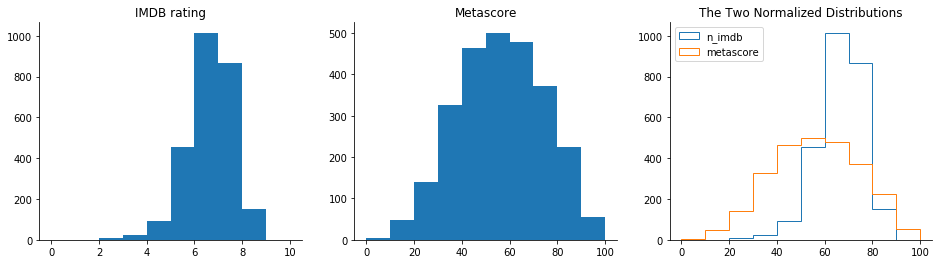

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes

ax1.hist(movie_ratings['imdb'], bins = 10, range = (0,10)) # bin range = 1
ax1.set_title('IMDB rating')

ax2.hist(movie_ratings['metascore'], bins = 10, range = (0,100)) # bin range = 10
ax2.set_title('Metascore')

ax3.hist(movie_ratings['n_imdb'], bins = 10, range = (0,100), histtype = 'step')
ax3.hist(movie_ratings['metascore'], bins = 10, range = (0,100), histtype = 'step')
ax3.legend(loc = 'upper left')
ax3.set_title('The Two Normalized Distributions')

for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()